# Regression: Simple Linear 
*Dataset* : **diabetes.csv**
- Apply Data pre-processing (Label Encoding , Data Transformation….) techniques if necessary.
- Use any one feature of the dataset to train and test the regression model. Also calculate coefficients, residual sum of squares and the coefficient of determination

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [54]:
data = pd.read_csv("diabetes.csv")

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Linear Regression Model

In [55]:
# extracting the feature and target variable
feature = 'Age'

X = data[[feature]]
Y = data['Outcome']

In [56]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=12)

model = LinearRegression()

In [57]:
model.fit(x_train, y_train)

LinearRegression()

In [58]:
y_pred = model.predict(x_test)

In [59]:
coefficients = model.coef_
rss = ((y_pred - y_test) ** 2).sum()
r2 = metrics.r2_score(y_test, y_pred)


# Display the results
print(f'Coefficients: {coefficients}')
print(f'Residual Sum of Squares (RSS): {rss}')
print(f'Coefficient of Determination (R^2): {r2}')

Coefficients: [0.00935108]
Residual Sum of Squares (RSS): 32.66740220131283
Coefficient of Determination (R^2): 0.07607347309418222


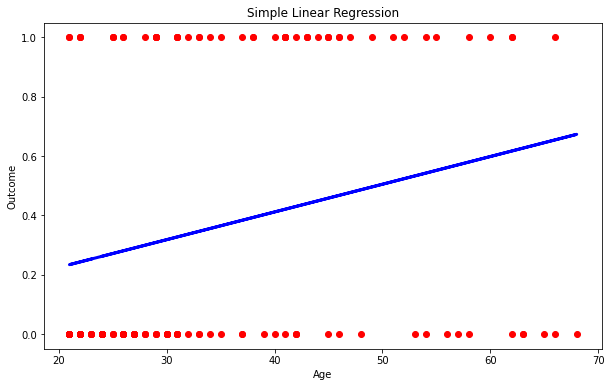

In [61]:
plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_test, color="red")
plt.plot(x_test, y_pred, color='blue', linewidth=3)
plt.xlabel(feature)
plt.ylabel('Outcome')
plt.title('Simple Linear Regression')
plt.show()

# Linear Regression using Gradient Descent Algorithm

In statistics, linear regression is a linear approach to modelling the relationship between a dependent variable and one or more independent variables. 
Let **X** be the independent variable and **Y** be the dependent variable. We will define a linear relationship between these two variables as follows:  


\\[ Y = mX + c \\]  
![mxplusc](http://www.nabla.hr/SlopeInterceptLineEqu.gif)

This is the equation for a line. **m** is the slope of the line and **c** is the y intercept. We will use this equation to train our model with a given dataset and predict the value of **Y** for any given value of **X**. 

## Loss function  
The loss is the error in our predicted of **m** and **c**. Our goal is to minimize this error to obtain the most accurance value of **m** and **c**.  
We will use the Mean Squared Error function to calculate the loss. There are three steps in this function:
1. Find the difference between the actual y and predicted y value(y = mx + c), for a given x.  
2. Square this difference.
3. Find the mean of the squares for every value in X.  
\\[ E = \frac{1}{n} \sum_{i=0}^n (y_i - \bar y_i)^2\\]  

Imagine a valley and a person with no sense of direction who wants to get to the bottom of the valley. He goes down the slope and takes large steps when the slope is steep and small steps when the slope is less steep. He decides his next position based on his current position and stops when he gets to the bottom of the valley which was his goal.   
Let's try applying gradient descent to **m** and **c** and approach it step by step: 
1. Initially let m = 0 and c = 0. Let L be our learning rate. This controls how much the value of **m** changes with each step. L could be a small value like 0.0001 for good accuracy. 
2. Calculate the partial derivative of the loss function with respect to m, and plug in the current values of x, y, m and c in it to obtain the derivative value **D**.  
\\[ D_m = \frac{1}{n} \sum_{i=0}^n 2(y_i - (mx_i + c))(-x_i) \\]
\\[ D_m = \frac{-2}{n} \sum_{i=0}^n x_i(y_i - \bar y_i) \\]  
$D_m$ is the value of the partial derivative with respect to **m**. Similarly lets find the partial derivative with respect to **c**, $D_c$ :  
\\[ D_c = \frac{-2}{n} \sum_{i=0}^n (y_i - \bar y_i) \\]
3. Now we update the current value of **m** and **c** using the following equation: 
\\[ m = m - L \times D_m\\]  
\\[ c = c - L \times D_c\\]  
4. We repeat this process untill our loss function is a very small value or ideally 0 (which means 0 error or 100% accuracy). The value of **m** and **c** that we are left with now will be the optimum values.  
  
Now going back to our analogy, **m** can be considered the current position of the person. **D** is equivalent to the steepness of the slope and **L** can be the speed with which he moves. Now the new value of **m** that we calculate using the above equation will be his next positon, and $L \times D$ will be the size of the steps he will take. When the slope is more steep (**D** is more) he takes longer steps and when it is less steep (**D** is less), he takes smaller steps. Finally he arrives at the bottom of the valley which corresponds to our loss = 0.  
We repeat the same process above to find the value of **c** also. Now with the optimum value of **m** and **c** our model is ready to make predictions !  

## Gradient Descent Algorithm
Gradient descent is an iterative optimization algorithm to find the minimum of a function. Here that function is our Loss Function. 

## Implementing the model

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


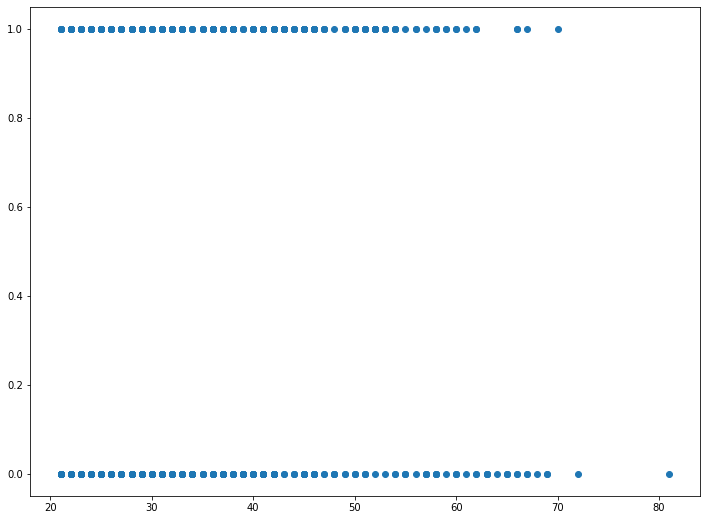

In [64]:
plt.rcParams['figure.figsize'] = (12.0, 9.0)

data = pd.read_csv('diabetes.csv')
X = data['Age']
Y = data['Outcome']

plt.scatter(X, Y)
plt.show()

In [81]:
#   Building the model

m = 0
c = 0

L = 0.00001  #   the learning rate
epochs = 1000   #   the number of iterations we need to perform

n = float(len(X))   #   number of elements in X
print('X shape is : ', X.shape)
print('Y shape is : ', Y.shape)


#   Performing gradient descent
for i in range(epochs):
    Y_pred = m*X + c    #   the current predicted value of Y
    D_m = (-2/n) * sum(X * ( Y - Y_pred))   #   Derivative wrt to m
    D_c = (-2/n) * sum(Y - Y_pred)  #   Derivative wrt to c
    m = m - L * D_m
    c = c - L * D_c

print(m, c)


X shape is :  (768,)
Y shape is :  (768,)
0.010396533467385876 0.00033873912292186226


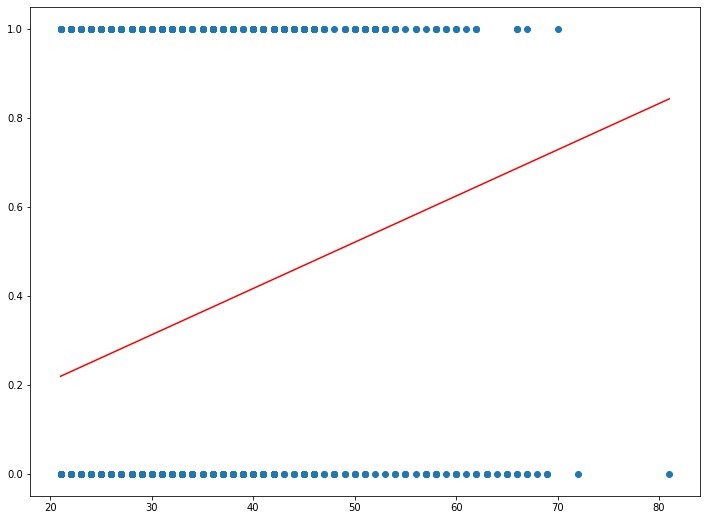

In [82]:
#   making predictions

plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')

plt.show()